# Lekce 9

In [1]:
import pandas
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Support Vector Machine

Support Vector Machine (SVC, metoda podpůrných vektorů) je další z algoritmů strojového učení, který můžeme použít pro klasifikaci. Algoritmus je založený na rozdělení možných hodnot vstupních proměnných do různých nadrovin (hyperplane). Nadroviny máme vždy dvě - pozitivní nadrovinu a negativní nadrovinu. Následně klasifikujeme data podle příslušnosti do pozitivní či negativní nadroviny. Algoritmus nakreslí hranici mezi nadrovinami tak, aby mezi nimi vznikl co nejširší pás bez pruhů.

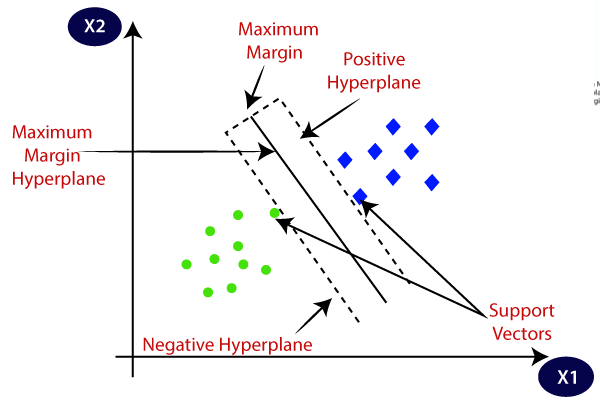

Na obrázku je případ, kdy jsou obě skupiny **lineárně oddělitelné**. To ale nemusí platit vždy. V některých případech se mohou obě skupiny prolínat a není pak možné vytvořit dvě nadroviny. V takovém případě máme více možností. 

Jednou z nich je nakreslení nadrovin tak, abychom minimalizovali celkový součet špatně umístěných bodů od hranice. Jinými slovy, snažíme se, aby bodů, které jsou na špatné straně, bylo co nejméně a aby jejich vzdálenost od hranice byla co nejmenší. Takovou hranici pak označujeme jako *soft margin*.

Další z možností je použití nelineárního klasifikátoru. To spočívá v převedení dat do vyšších rozměrů. Máme-li například dvourozměrná data, můžeme data přenést do trojrozměrného prostoru. Ve trojrozměrném prostoru už pak může být možné vytvoření nadrovin tak, aby byly všechny vstupní hodnoty oddělené. Níže je příklad převedení dat z dvourozměrného prostoru do trojrozměrného. Třetí dimenze (výška) je daná vzdáleností od středu. Čím je bod v dvourozměrném prostoru blíže ke středu, tím výše ho umístíme ve dvourozměrném prostoru. Ve trojrozměrném prostoru již můžeme data rozdělit na dvě nadroviny.

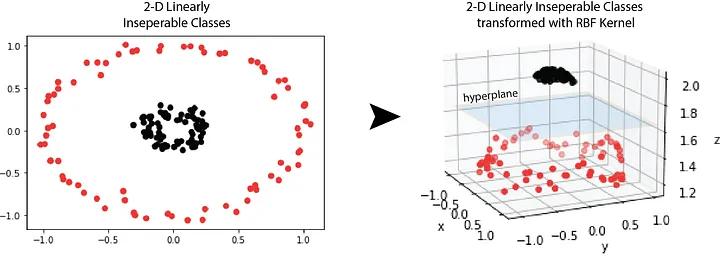

My se budeme držet lineárního klasifikátoru, tj. takového, který nezvyšuje počet dimenzí našich dat. Využijeme ho pro rozdělení vín na dobrá a špatná a porovnáme si výkon SVC s algoritmem K Neares Neighbors.

In [2]:
data = pandas.read_csv("wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Kód je v podstatě stejný jako v minulé lekci. Pouze s tím rozdílem, že jako klasifikátor využijeme `LinearSVC`.

In [3]:
X = data.drop(columns=["quality"])
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\Users\jirip\repos\PythonProDataScience\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Opět si můžeme vytvořit matici záměn.

Vidíme, že oproti KNN (s výchozí hodnotou 5 uvažovaných sousedů) máme více True Negatives, ale za cenu méně True Positives.

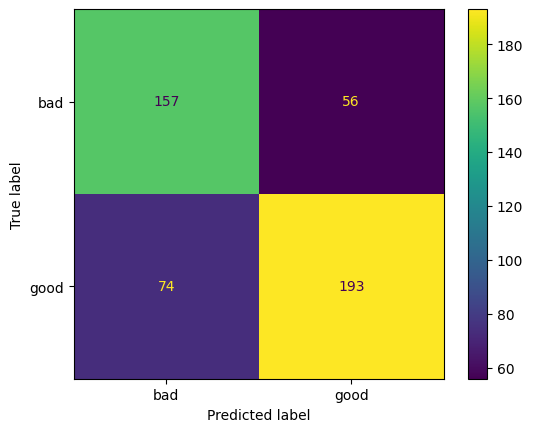

In [4]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

Můžeme si spočítat i metriky, které jsme si ukazovali v minulé lekci. Vidíme, že hodnoty metrik jsou srovnatelné s hodnotami metrik KNN.

In [5]:
accuracy_score(y_test, y_pred)

0.7291666666666666

In [6]:
precision_score(y_test, y_pred, pos_label="good")

0.7751004016064257

In [7]:
recall_score(y_test, y_pred, pos_label="good")

0.7228464419475655

Zjistili jsme tedy, že výsledky obou algoritmů jsou srovnatelné. Podobné byly i výsledky, kterých dosáhla logistická regrese, která byla popsaná ve čtení na doma.

## Klasifikace do více než dvou tříd

V řadě případů potřebujeme rozdělovat data do více než dvou tříd. Například pacienty můžeme rozdělovat dle stádia jejich nemoci (tj. nerozlišujeme jen zdravé a nemocné pacienty, ale pacienty v počátečním a pokročilém stádiu nemoci), v dopravě můžeme klasifikovat několik typů vozidel (např. osobní automobil, nákladní automobil, autobus, traktor atd.), zákaznické recence můžeme rozlišovat na pozitivní, neutrální a negativní atd.

Klasifikaci do více tříd můžeme provádět více způsoby. Jedním z nich je "přímé" řešení, tj. pracujeme od začátku do konce s klasifikací do více tříd. Takový přístup využívá například algoritmus K Nearest Neighbors nebo rozhodovací strom.

Druhým z přístupů je převed úlohy s více třídami na problém dvou tříd, tedy binární klasifikaci. Takto postupuje algoritmus Support Vector Machine. Tento postup je dále možné provádět dvěma různými způsoby.

Prvním z nich je varianta "jeden proti všem" (**One-to-Rest**). Při jeho použití algoritmus vytvoří tolik klasifikátorů, kolik máme tříd, a trénuje každý jako binární klasifikaci jedné třidy oproti všem ostatním. Při predikci každý z klasifikátorů předpoví buď "svojí" třídu, nebo "ostatní třídy". Z těch, které vyberou "svojí" třídu, algoritmus pak vybere tu, která má nejvyšší skóre, nebo jistotu. Pokud bychom například rozdělovali data do tří skupin, vytvoří tento postup tři klasifikátory.

Přístup vidíme na obrázku níže. Při řešení pak vzniknou celkem tři hranice. Červené hranice odděluje červené body od ostatních (a je jedno, zda od zelených či modrých, oboje jsou v rámci řešení považovány za stejnou skupinu). Podobně zelená odděluje zelené od ostatních a modrá od ostatních. Tento postup využívá klasifikátor `LinearSVC`.

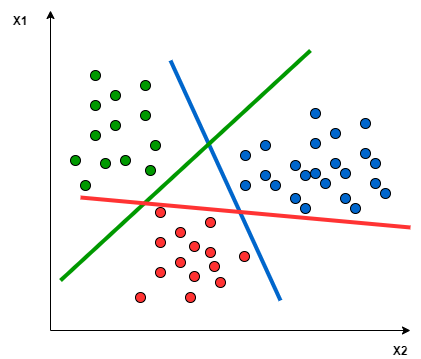


Druhou z možností je "jeden proti jednomu" (**One-to-One**). Při jeho použití algoritmus vytvoří tolik klasifikátorů, kolik je dvojic tříd. Při predikci pak algoritmus vybere tu třídu, která dostala nejvíc hlasů. Níže napříkald vidíme zeleno-červenou hranici, která odděluje zelené a červené body. Při tvorbě této hranice jsou modré body zcela ignorovány. Podobně jsou například ignorovány zelené body při tvorbě červeno-modré hranice.

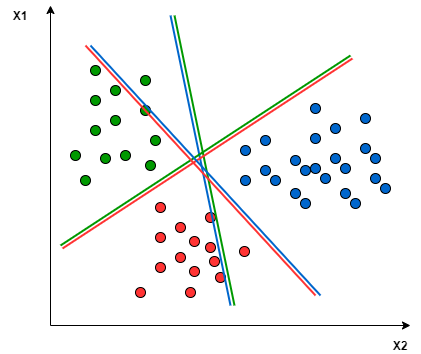

Přístup si vyzkoušíme na datech o onemocnění sojových bobů, které můžeme rozdělit do tří různých skupin:

- brown-spot (onemocnění způsobené houbou Bipolaris oryzae),
- alternarialeaf-spot (plísňové onemocnění způsobené patogenem Alternaria spp),
- frog-eye-leaf-spot (plísňové onemocnění způsobené patogenem Cercospora spp).

In [8]:
data = pandas.read_csv("soybean-1-spot.csv")
data

,leaf-shread,stem,lodging,stem-cankers,fruiting-bodies,external-decay,fruit-pods,fruit-spots,seed,seed-discolor,seed-size,shriveling,class
0,absent,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
1,absent,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
2,present,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
3,present,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
4,absent,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,absent,abnorm,yes,above-sec-nde,absent,firm-and-dry,diseased,colored,norm,absent,norm,absent,frog-eye-leaf-spot
270,absent,abnorm,yes,above-sec-nde,absent,firm-and-dry,diseased,colored,norm,absent,norm,absent,frog-eye-leaf-spot
271,absent,abnorm,yes,above-sec-nde,absent,firm-and-dry,diseased,colored,norm,absent,norm,absent,frog-eye-leaf-spot
272,absent,abnorm,yes,above-sec-nde,absent,firm-and-dry,diseased,colored,norm,absent,norm,absent,frog-eye-leaf-spot


In [9]:
X = data.drop(columns=["class"])
y = data["class"]
y.value_counts()

class
brown-spot             92
alternarialeaf-spot    91
frog-eye-leaf-spot     91
Name: count, dtype: int64

Kategorické proměnné, v tomto případě všechny, musíme převést na číselné, pomocí metody one-hot (angl. _one-hot encoding_).

In [10]:
encoder = OneHotEncoder()
X = encoder.fit_transform(X)
# Tento řádek je pouze pro kontrolu
pandas.DataFrame(X.toarray(), columns=encoder.get_feature_names_out()).head()

,leaf-shread_absent,leaf-shread_present,stem_abnorm,stem_norm,lodging_no,lodging_yes,stem-cankers_above-sec-nde,stem-cankers_above-soil,stem-cankers_absent,fruiting-bodies_absent,...,fruit-spots_brown-w/blk-specks,fruit-spots_colored,seed_abnorm,seed_norm,seed-discolor_absent,seed-discolor_present,seed-size_lt-norm,seed-size_norm,shriveling_absent,shriveling_present
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


Třídy převedeme na celočíselnou reprezentaci

In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Rozdělíme data na trénovací a testovací sadu.

Parametr `stratify` určuje, podle jakého sloupce chceme zachovat poměr hodnot. V našem případě chceme zachovat poměr tříd (aby v trénovacích i testovacích datech byly třídy podobně zastoupené).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [13]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Jak vyhodnocujeme klasifikaci do více tříd? 
Podíváme se, jak vypadá chybová matice pro více tříd. Funguje na stejném principu, jen je větší, a není na první pohled jasné, jak spočítat metriky jako precision nebo recall. Všimněme si ale, že základní metriky accuracy je stejná: Součet hodnot na diagonále (součet správně určených bodů) oproti velikosti datasetu.

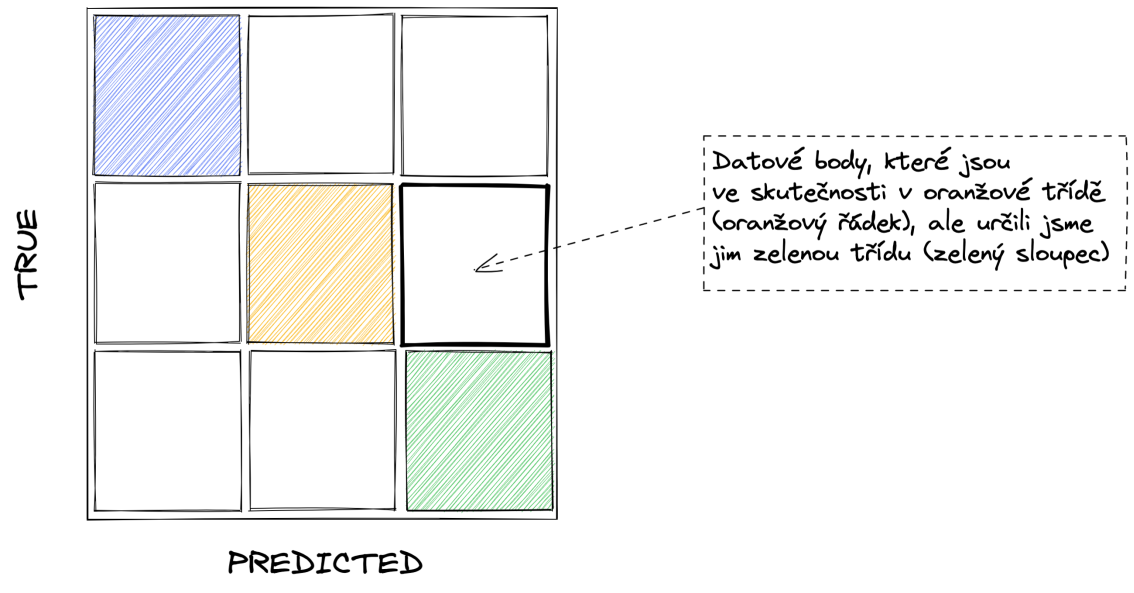
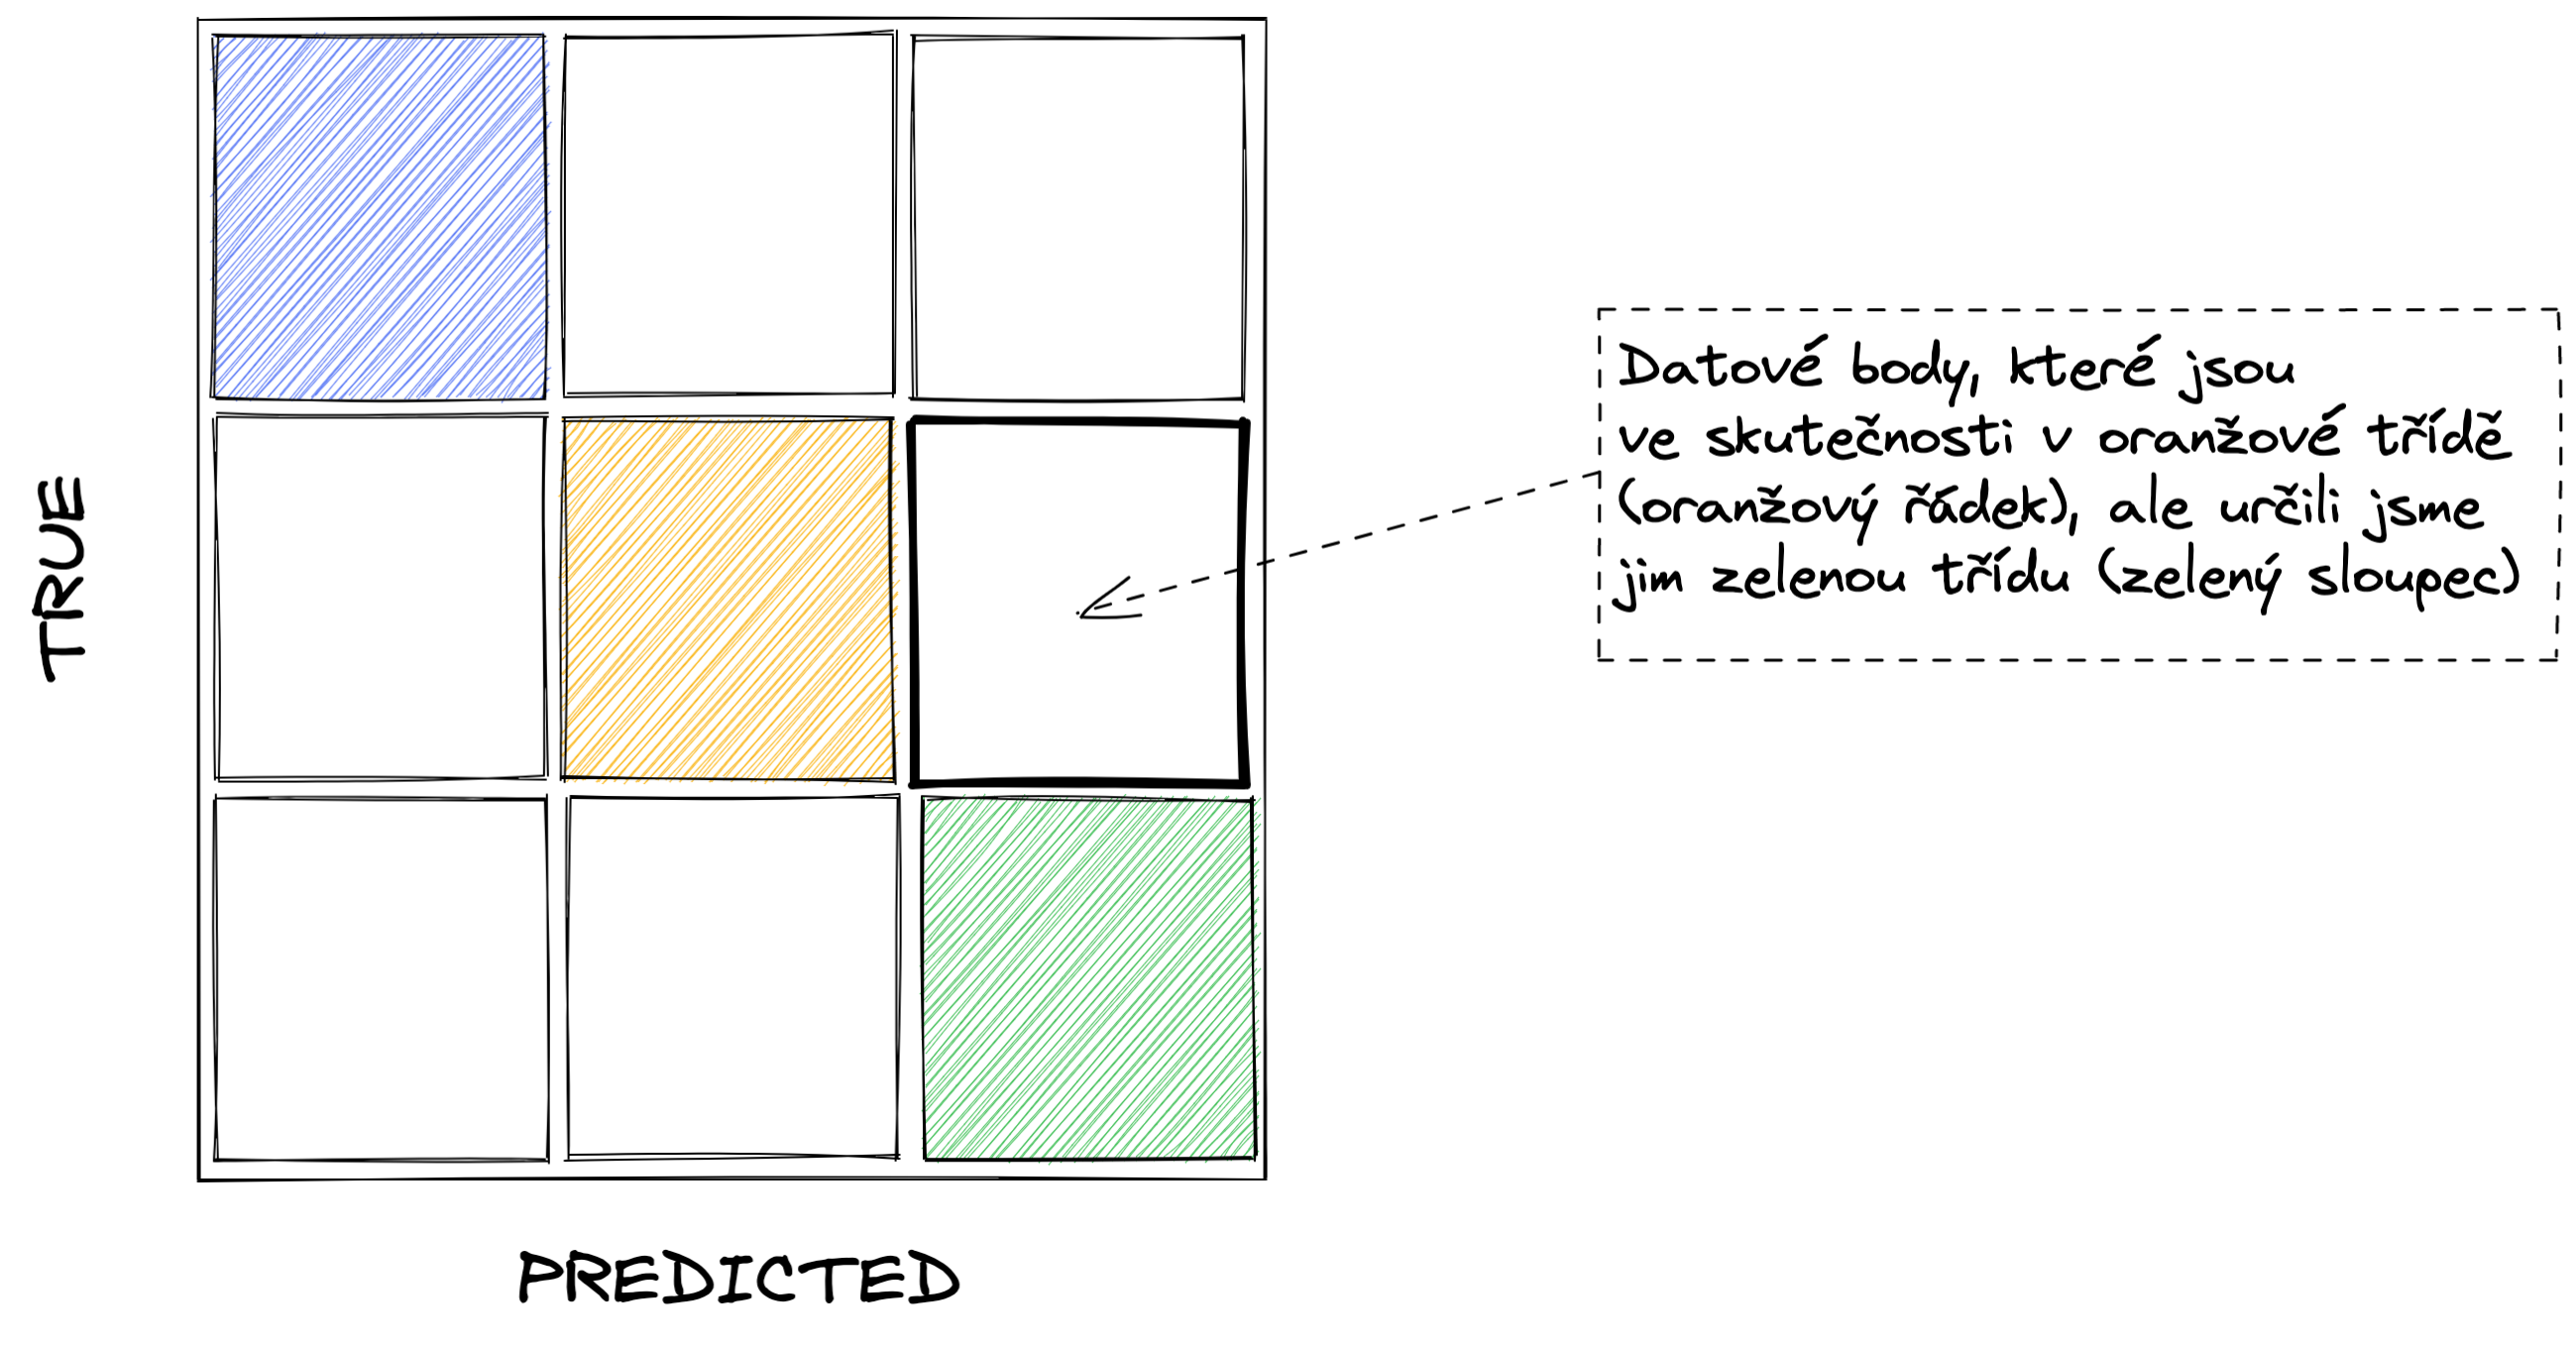

In [14]:
confusion_matrix(y_test, y_pred)

array([[28,  0,  0],
       [ 4, 24,  0],
       [ 8,  1, 18]], dtype=int64)

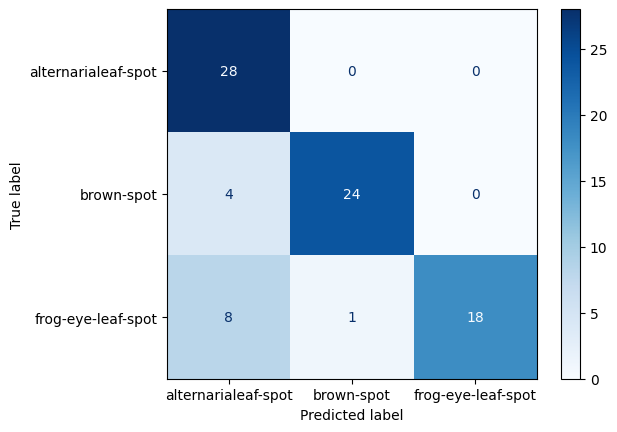

In [15]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=encoder.classes_,
    cmap=plt.cm.Blues,
)

Nyní můžeme vyhodnotit přesnost. Využijeme metriku `accuracy_score`, která poměřuje počet správně označených testovacích dat oproti celkovému množství testovacích dat.

In [16]:
print(accuracy_score(y_test, y_pred))

0.8433734939759037


# Upravení více parametrů: Grid search

V minulé lekci jsme si ukazovali, že na trénování modelu může mít vliv hodnota jeho některého parametru. Například u algoritmu K Nearest Neighbors jsme zkoušeli nastavit různé hodnoty parametru `n_neighbors` pomocí for cyklu. Když bychom parametrů měli víc, můžeme použít vnořený for cyklus, ale brzy by se nám výsledky špatně porovnávaly. V knihovně `scikit-learn` existuje třída `GridSearchCV`, která nejlepší nastavení parametrů zjistí za nás.

Dělá to tak, že si trénovací data rozdělí na několik částí, a na těchto rozdělených datech trénuje a testuje model s různými parametry. Pak výsledky zprůměruje přes všechny díly a na základě toho určí nejlepší parametry.

In [17]:
model_1 = KNeighborsClassifier()
params_1 = {"n_neighbors": range(1, 31, 2)}

clf_1 = GridSearchCV(model_1, params_1, scoring="accuracy")
clf_1.fit(X, y)

print(clf_1.best_params_)
print(round(clf_1.best_score_, 2))

{'n_neighbors': 21}
0.77


Nakonec porovnáme výsledky algoritmu K Nearest Neighbors se Support Vector Machine. Tentokrát využijeme jako klasifikátor `SVC`. Zůstaneme u lineární verze, to zajistíme nastavením `kernel="linear"`. Klasifikátor `SVC` nám ale umožní vyzkoušet strategii jeden proti všem i jeden proti jednomu. Pomocí `GridSearchCV` se podíváme, která strategie vede k lepšímu výsledku.

In [18]:
model_2 = SVC(kernel="linear")
params_2 = {"decision_function_shape": ["ovo", "ovr"]}

clf_2 = GridSearchCV(model_2, params_2, scoring="accuracy")
clf_2.fit(X, y)

print(clf_2.best_params_)
print(round(clf_2.best_score_, 2))

{'decision_function_shape': 'ovo'}
0.76


## Zdroje

* [Support Vector Machine Algorithm](https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm)
* [Multiclass Classification Using Support Vector Machines](https://www.baeldung.com/cs/svm-multiclass-classification)
* [Support Vector Machines (SVM) and the Multi-Dimensional Wizardry](https://towardsdatascience.com/support-vector-machine-svm-and-the-multi-dimensional-wizardry-b1563ccbc127)
* [Support Vector Machine(SVM): A Complete guide for beginners](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

# Cvičení

## Kosatce

Data jsou [zde](IRIS.csv).

Datovou sadu s daty o kosetcích (Iris) představil britský statistik a biolog Ronald Fisher ve svém článku z roku 1936 o využití mnohonásobných měření v taxonomických problémech. Někdy se mu říká Andersonův kosatcový datový soubor, protože Edgar Anderson shromáždil data k měření morfologické variace květin kosatce tří souvisejících druhů. Datová sada obsahuje 50 vzorků od každého ze tří druhů kosatce (Iris Setosa, Iris virginica a Iris versicolor). Od každého vzorku byly změřeny čtyři vlastnosti: délka a šířka kališních lístků a korunních lístků, v centimetrech.

Tato datová sada se stala typickým testovacím případem pro mnoho statistických klasifikačních technik v strojovém učení, jako jsou například podpůrné vektorové stroje.

Využij algoritmy `KNeighborsClassifier` a `SVC` ke klasifikaci každého vzorku do jednoho ze tří druhů kosance.

Postup je stejný jako v lekci:

- Rozděl data na vstupní a výstupní proměnné. 
- Využij `GridSearchCV` k nalezení nejlepšího parametru pro `KNeighborsClassifier` (počet sousedů) a `SVC` (strategie)
- Dále vyzkoušej, jestli by nebylo zajímavé převést data do více dimenzí. Porovnej výsledek lineárního kernelu (`kernel="linear"`) s kernelem (`kernel="rbf"`). Můžeš vyzkoušet obě strategie, tj. budeš mít ve slovníku `params` dva klíče a každý z klíčů bude mít seznam dvou možných hodnot. Jaká dvojice parametrů má nejlepší hodnotu metriky `accuracy`?

In [19]:
data = pandas.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Bonus: Poruchy

Stáhni si data o poruchách ze souboru [predictive_maintenance.csv](predictive_maintenance.csv). Význam sloupců je následující:

- UID: jedinečný identifikátor v rozsahu 1 až 10000,
- ID produktu: skládá se z písmene L, M nebo H pro nízkou (50 % všech výrobků), střední (30 %) a vysokou (20 %) variantu kvality výrobku a sériového čísla specifického pro danou variantu,
- teplota vzduchu (K),
- teplota procesu (K),
- otáčky (ot/min),
- točivý moment (Nm),
- opotřebení nástroje (min),
- označení "selhání stroje" (pokud k němu došlo).

Tvým úkolem je vytvořit model, který bude predikovat poruchu stroje.

Proveď následující postup:

- Vyřaď z datasetu sloupce (jsou dva), které nemají pro analýzu význam.
- Podívej se, kolik typů poruch bylo objeveno. Vyřaď nejméně častou poruchu.
- Rozděl data na vstupní proměnné a výstupní proměnnou.
- Vyzkoušej algoritmy Support Vector Machine a K Nearest Neighbors ke klasifikaci poruchy stroje. Porovnej, který algoritmus dosáhl lepších výsledků.

In [20]:
data = pandas.read_csv("predictive_maintenance.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [21]:
data.groupby("Failure Type").size()

Failure Type
Heat Dissipation Failure     112
No Failure                  9652
Overstrain Failure            78
Power Failure                 95
Random Failures               18
Tool Wear Failure             45
dtype: int64